## About the data

Police residence data

The raw data behind the story, [Most Police Don’t Live In The Cities They Serve](http://fivethirtyeight.com/datalab/most-police-dont-live-in-the-cities-they-serve/)

Includes the cities with the 75 largest police forces, with the exception of Honolulu for which data is not available. All calculations are based on data from the U.S. Census.

The Census Bureau numbers are potentially going to differ from other counts for three reasons:

The census category for police officers also includes sheriffs, transit police and others who might not be under the same jurisdiction as a city’s police department proper. The census category won’t include private security officers.
The census data is estimated from 2006 to 2010; police forces may have changed in size since then.
There is always a margin of error in census numbers; they are estimates, not complete counts.

Data definitions:

* city: 	            U.S. city
* police_force_size:	Number of police officers serving that city
* all:	            Percentage of the total police force that lives in the city
* white:	            Percentage of white (non-Hispanic) police officers who live in the city
* non-white:	        Percentage of non-white police officers who live in the city
* black:	            Percentage of black police officers who live in the city
* hispanic:	        Percentage of Hispanic police officers who live in the city
* asian:	            Percentage of Asian police officers who live in the city

Note: When a cell contains '**' it means that there are fewer than 100 police officers of that race serving that city.


## Load in data

In [60]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame

plt.style.use('fivethirtyeight')
%matplotlib inline

In [189]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/police-locals/police-locals.csv"
df = pd.read_csv(url)
df.head()

,city,police_force_size,all,white,non-white,black,hispanic,asian
0,New York,32300,0.617957,0.446387,0.764419,0.770891365,0.762860728,0.749235474
1,Chicago,12120,0.875000,0.871963,0.877400,0.89740566,0.83982684,0.966666667
2,Los Angeles,10100,0.228218,0.152778,0.263848,0.387387387,0.217679558,0.305263158
3,Washington,9340,0.115632,0.056774,0.157365,0.170189099,0.08988764,0.230769231
4,Houston,7700,0.292208,0.173735,0.399258,0.36637931,0.457142857,0.408163265


## Try to recreate the following scatter plot

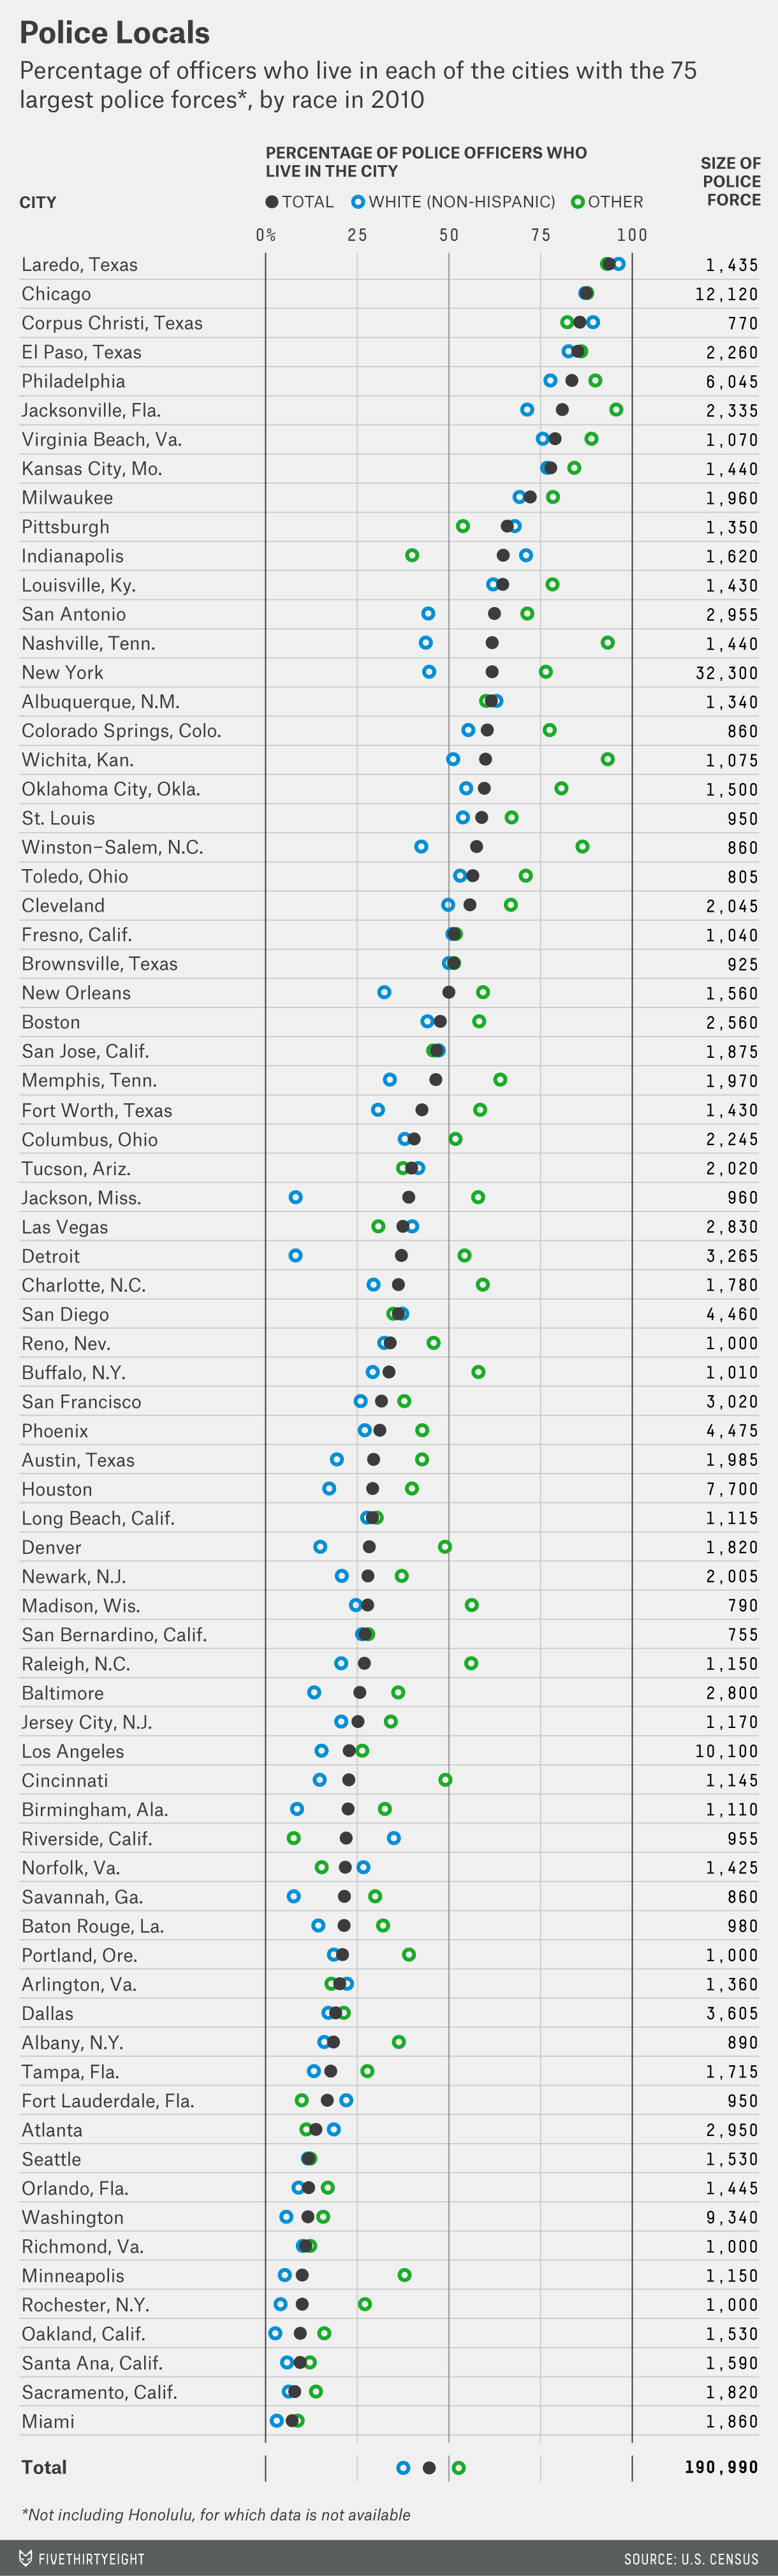

In [62]:
Image('https://espnfivethirtyeight.files.wordpress.com/2014/08/silver-police-force-race1.png')

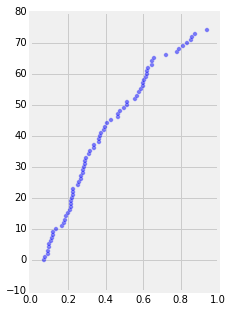

In [67]:
# specifies the parameters of plot
fig = plt.figure(figsize=(3,5), dpi=1600)
alpha=alpha_scatterplot = 0.5 

plt.scatter(df['all'], range(len(df['all'])), alpha=alpha)

In [64]:
# sort by 'all'
df.sort('all', inplace=True, ascending=True)

# reset index
df.reset_index(drop=True, inplace=True)

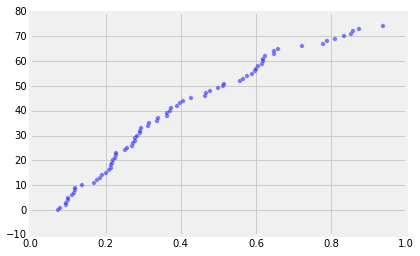

In [68]:
plt.scatter(df['all'], range(len(df['all'])), alpha=alpha)

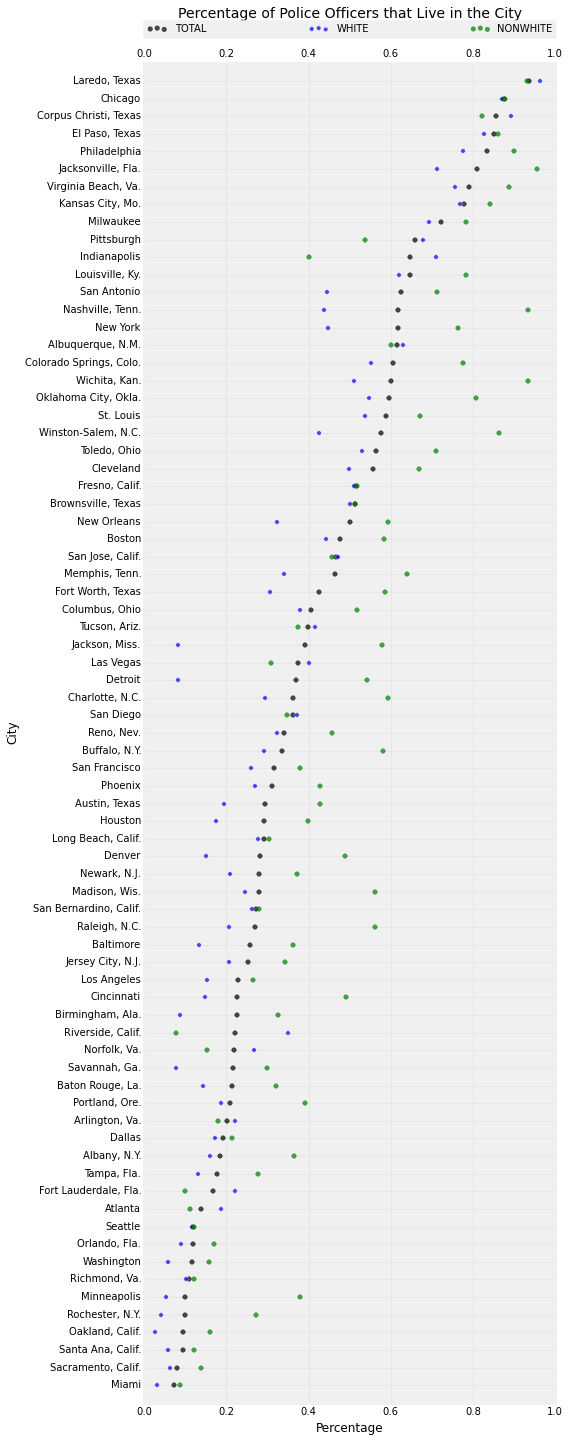

In [194]:
# Create figure using matplotlib
fig, ax = plt.subplots(figsize=(8, 20))

# sort by 'all'
df.sort('all', inplace=True, ascending=True)
# reset index
df.reset_index(drop=True, inplace=True)

# Design figure
ax.set_title("Percentage of Police Officers that Live in the City",fontsize=14,y=1.03)
ax.set_xlabel("Percentage",fontsize=12)
ax.set_ylabel("City",fontsize=12)
ax.grid(True,linestyle='-',color='0.9')
ax.set_ylim([-1,len(df['city'])])
ax.set_xlim(0,1)
plt.yticks(range(len(df['city'])), df['city'])
ax.tick_params(labelbottom='on',labeltop='on')
alpha=0.7

# Plot the data
total = ax.scatter(df['all'], range(len(df['all'])), color='black', marker='o', alpha=alpha)
white = ax.scatter(df['white'], range(len(df['white'])), marker='o', alpha=alpha)
nonwhite = ax.scatter(df['non-white'], range(len(df['non-white'])), color='green', marker='o', alpha=alpha)

# Create legend
plt.legend([total, white, nonwhite], ['TOTAL', 'WHITE', 'NONWHITE'],
          bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", ncol=3,
           borderaxespad=-0.1, fontsize=10)

fig.tight_layout()
fig.savefig('/Users/Will/personal-website/assets/2016-05-24-fig3.png', dpi=900)